In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SIR

In [2]:
import SIR
import animate_plot as ap

## Functions

In [3]:
def plot_state(
    x: np.ndarray, y: np.ndarray, sol: np.ndarray, t, i_t: int, save: bool = False
) -> None:
    titles = ["Susceptible", "Infected", "Recovered"]
    cmaps = ["Blues", "Reds", "YlGn"]

    plt.rcParams["font.size"] = 12
    fig, axs = plt.subplots(
        1,
        3,
        subplot_kw={"projection": "3d", "xlabel": "x", "ylabel": "y"},
        figsize=(26, 10),
    )
    for ax in axs:
        ax.set_zlim(0, np.max(sol[i_t]) * 1.02)
    for i in range(len(axs)):
        axs[i].plot_surface(
            x,
            y,
            sol[i_t, i, :, :],
            cmap=cmaps[i],
            vmin=np.max(np.min(sol[i_t, i] - 10), 0),
        )
        axs[i].set_title(titles[i])
        axs[i].set_zlabel(titles[i])
    fig.suptitle(f"Plot of the SIR-model at time {t[i_t]:.3f}", fontsize=16)
    fig.tight_layout()
    if save:
        plt.savefig(f"./Images/plot-i_t={i_t}.pdf")
    else:
        plt.show()

In [4]:
def plot_state_2(
    x: np.ndarray, y: np.ndarray, sol: np.ndarray, t, i_t: int, save: bool = False
) -> None:
    titles = ["Susceptible", "Infected", "Recovered"]
    cmaps = ["Blues", "Reds", "YlGn"]

    plt.rcParams["font.size"] = 12
    fig, axs = plt.subplots(
        1,
        3,
        subplot_kw={"projection": "3d", "xlabel": "x", "ylabel": "y"},
        figsize=(26, 10),
    )
    for ax in axs:
        ax.set_zlim(0, np.max(sol[i_t]) * 1.02)
    for i in range(len(axs)):
        axs[i].plot_surface(
            x,
            y,
            sol[i_t, i, :, :],
            cmap=cmaps[i],
            vmin=np.max(np.min(sol[i_t, i] - 10), 0),
        )
        axs[i].set_title(titles[i])
        axs[i].set_zlabel(titles[i])
    fig.suptitle(f"Plot of the SIR-model at time {t[i_t]:.3f}", fontsize=16)
    fig.tight_layout()
    if save:
        plt.savefig(f"./Images/plot-i_t={i_t}.pdf")
    else:
        plt.show()

## Test problem

In [5]:
N = 100
M = 10_000
a = 10

x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))

S_0 = np.exp(-a / 2 * ((x_grid - 0.5)**2 / a + (y_grid - 0.25) ** 2))
I_0 = np.exp(-a / 2 * ((x_grid - 0.75) ** 2 + (y_grid - 0.75) ** 2))
R_0 = np.zeros((N, N))


total_num_people = np.sum(S_0 + I_0 + R_0)

S_0 /= total_num_people
I_0 /= total_num_people
R_0 /= total_num_people

x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N+2), np.linspace(0, 1, N+2))
beta = 100_000*np.exp(-a / 2 * ((x_grid - 0.25) ** 2 + (y_grid - 0.5)**2 / a))
gamma = 1
mu_I = 1e-1
mu_S = 1e-1

In [6]:
u, t = SIR.solve(1, 1, N, M, S_0, I_0, R_0, beta, gamma, mu_I, mu_S)

In [9]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N + 4), np.linspace(0, 1, N + 4))
# plot_state(x_grid, y_grid, u, t, 0, save=True)
# plot_state(x_grid, y_grid, u, t, 100, save=True)
# plot_state(x_grid, y_grid, u, t, 5000, save=True)
# plot_state(x_grid, y_grid, u, t, 10_000, save=True)

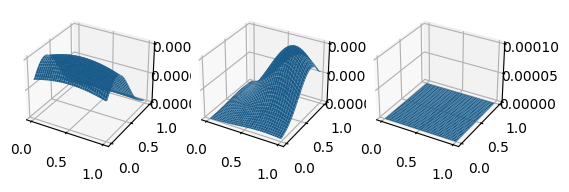

In [ ]:
anim_obj = ap.PlotAnimation(x_grid, y_grid, u, 500, 10)
anim = anim_obj.animate()
anim.save(filename="/anim.gif", writer="pillow")

## Sine

In [9]:
N = 100
M = 10_000
S_0 = np.ones((N, N)) * 100
I_0 = np.zeros((N, N))
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))
I_0[:, :] = 100 * (1 + np.sin(3 * np.pi * x_grid) * np.sin(3 * np.pi * y_grid))
R_0 = np.zeros((N, N))
total_num_people = np.sum(S_0 + I_0 + R_0)

S_0 /= total_num_people
I_0 /= total_num_people
R_0 /= total_num_people

beta = 10_000
gamma = 1
mu_I = 5e-2
mu_S = 1e-2

In [10]:
u, t = SIR.solve(1, 1, N, M, S_0, I_0, R_0, beta, gamma, mu_I, mu_S)

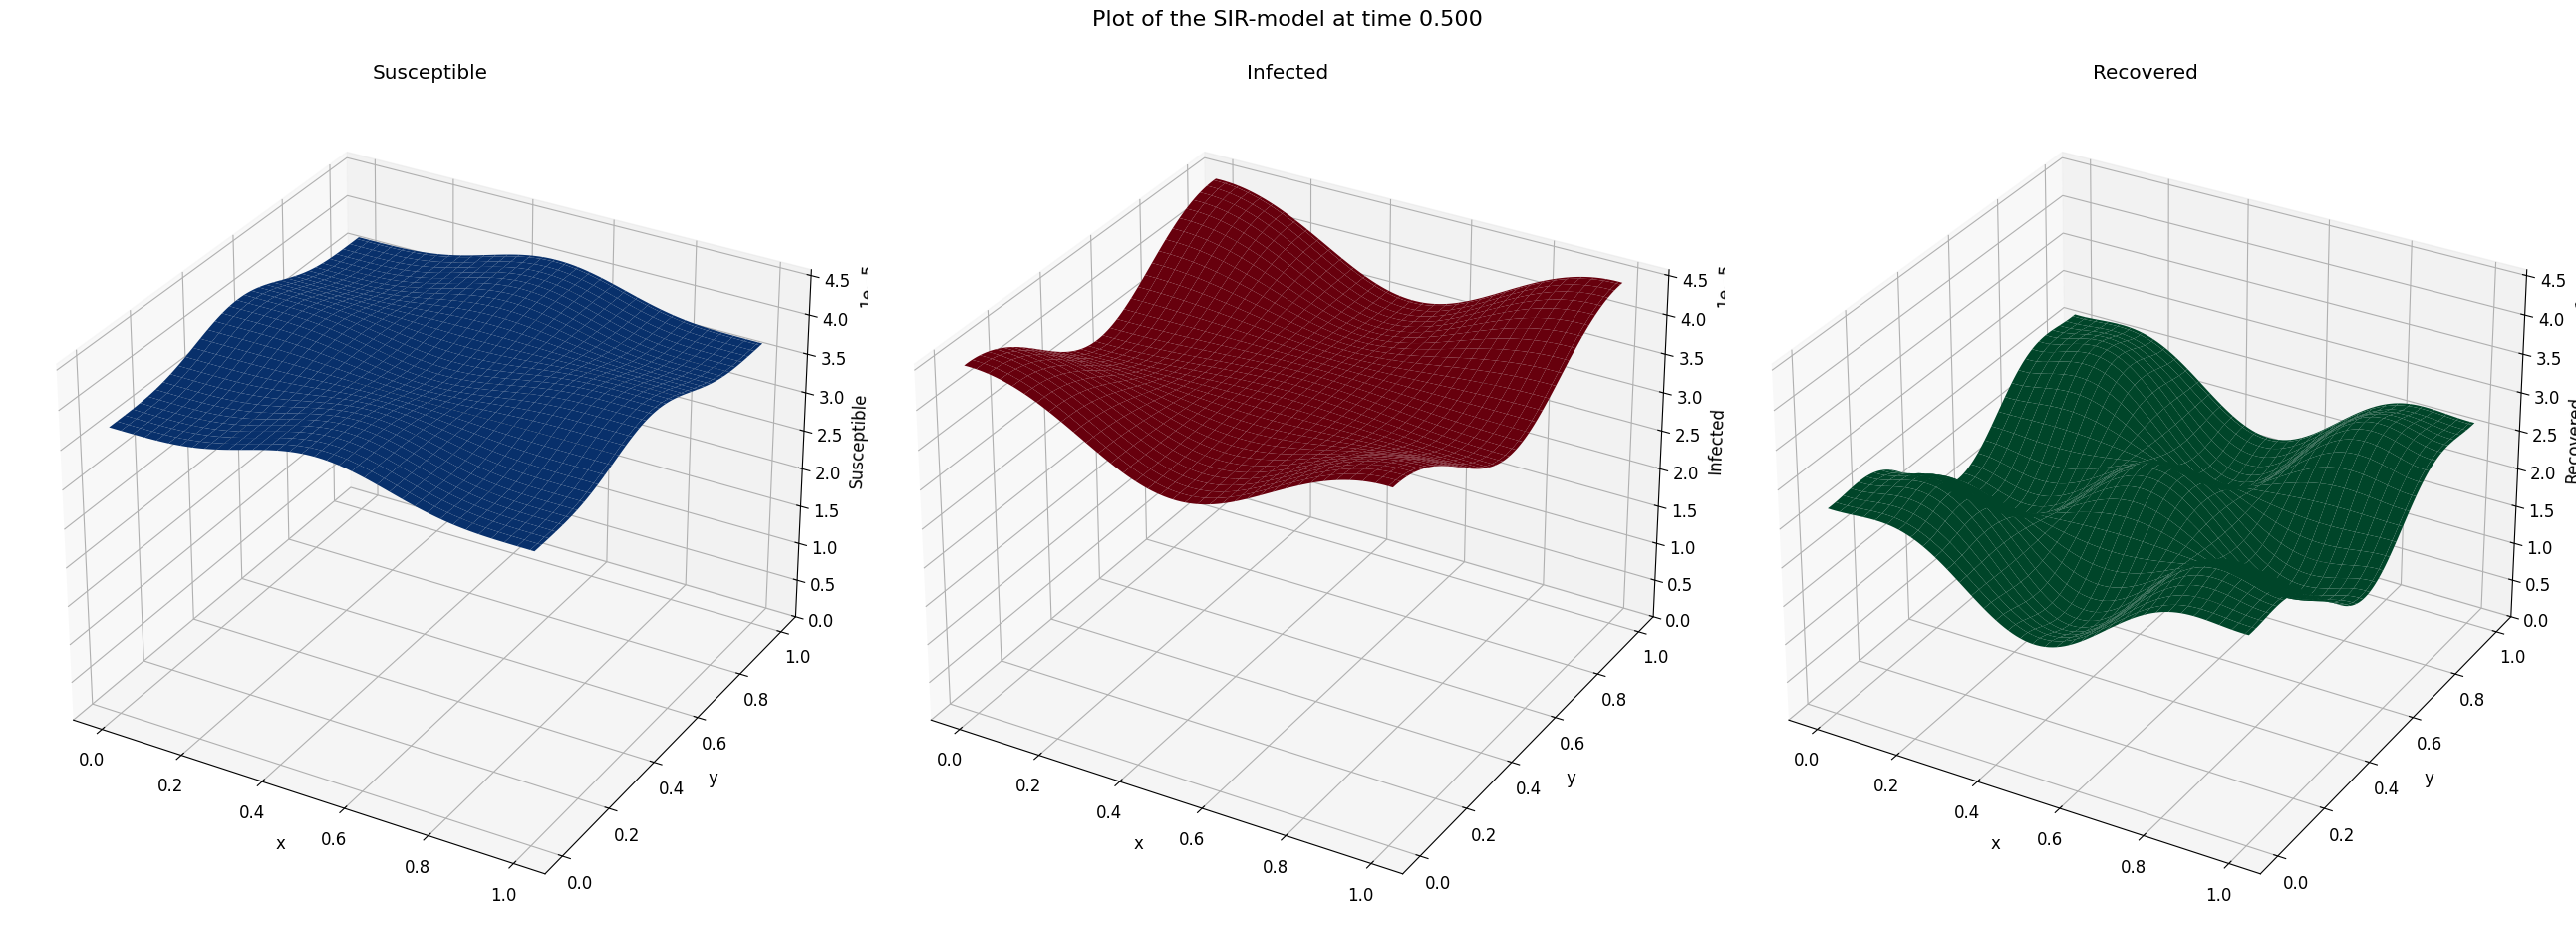

In [11]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, N + 4), np.linspace(0, 1, N + 4))
plot_state(x_grid, y_grid, u, t, 5_000, save=True)